# CREDIT CARD FRAUD DETECTION (TASK 5)

- **Build a machine learning model to identify fraudulent credit card  transaction**s

- **Preprocess and normalize the transaction data, handle class
 imbalance issues, and split the dataset into training and testing set**s

- **Train a classification algorithm, such as logistic regression or random
 forests, to classify transactions as fraudulent or genuin**e

- **Evaluate the model's performance using metrics like precision, recall,
 and F1-score, and consider techniques like oversampling or
 undersampling for improving resul**ts

## Credit card fraud is usually caused either by card owner’s negligence with his data or by a breach in a website’s security. Here are some examples:

A consumer reveals his credit card number to unfamiliar individuals.
A card is lost or stolen and someone else uses it.
Mail is stolen from the intended recipient and used by criminals.
Business employees copy cards or card numbers of its owner.
Making a counterfeit credit card.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

**Benefits**

Logistic Regression is well-suited for binary classification tasks and provides interpretable results.
SMOTE helps address class imbalance and prevent biased model outcomes.
The chosen approach aims to achieve high accuracy in detecting fraudulent transactions while minimizing false positives.

## In this CREDIT CARD FRAUD DETECTION MODEL using Machine Learning, I used logistic regression and decision tree classifier model in the dataset given which is named as "creditcard.csv"

 ## The following steps are used in this to make this predictions:

**1. Importing the libraries**

**2. Loading the dataset**

**3. Data Preprocessing**

**4. Data Visualization**

**5. Input Split and Standard Scaling**

**6. Model Training**

**7. ROC curve and AUC score**

# 1.IMPORTING THE LIBRARIES

All the libraries which are the used during the ML model making needs to be imported at first

- **PANDAS**

- **NUMPY**

- **MATPLOTLIB**

- **SEABORN**

- **SCIKIT-LEARN**

In [27]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

# 2.LOADING THE DATASET:

The dataset here used here contains features V1, V2.......... V28 are the principal components obtained with Principal Component Analysis, the only features which have not been transformed with Principal Component Analysis are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Dataset name: **creditcard.csv**

In [28]:
creditfr = pd.read_csv("creditcard.csv")


In [29]:
creditfr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditfr.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
#to display from the end
creditfr.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
creditfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#displays the data type
creditfr.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
#specifies the shape of the dataset
creditfr.shape

(284807, 31)

# 3.DATA PREPROCESSING:

The data preprocessing part handles the missing values and scale/normalize features.Then the data is sSplit the data into training and testing sets.

In [9]:
#checks and displays whether some values are empty or not
creditfr.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#displays statistics of the data
creditfr.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
#displays the colomns
creditfr.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
print('Frauds found', round(creditfr['Class'].value_counts()[1]/len(creditfr) * 100,2), '% of the dataset')

Frauds found 0.17 % of the dataset


In [13]:
print('Frauds nil', round(creditfr['Class'].value_counts()[0]/len(creditfr) * 100,2), '% of the dataset')

Frauds nil 99.83 % of the dataset


# 4.DATA VISUALIZATION:

The data is visualized here using a particular column and using different types of plots and graphs to display the data.It is known as the **graphical representation** of the data

<Axes: ylabel='count'>

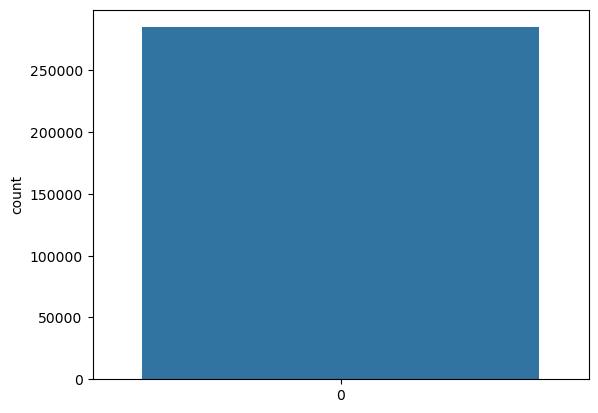

In [14]:
sns.countplot(creditfr['Class'])

<Axes: ylabel='count'>

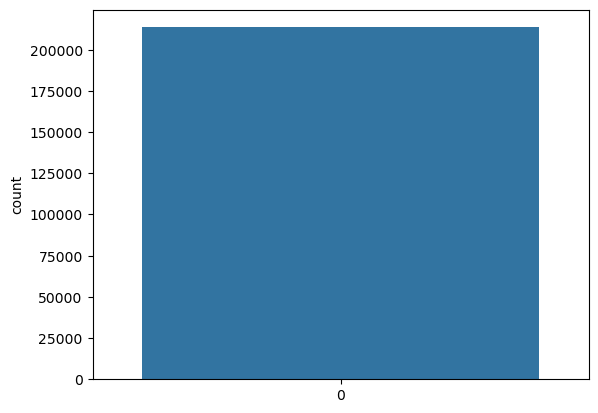

In [41]:
sns.countplot(b_train)

In [15]:
creditfr_temp = creditfr.drop(columns=['Time', 'Amount', 'Class'], axis=1)


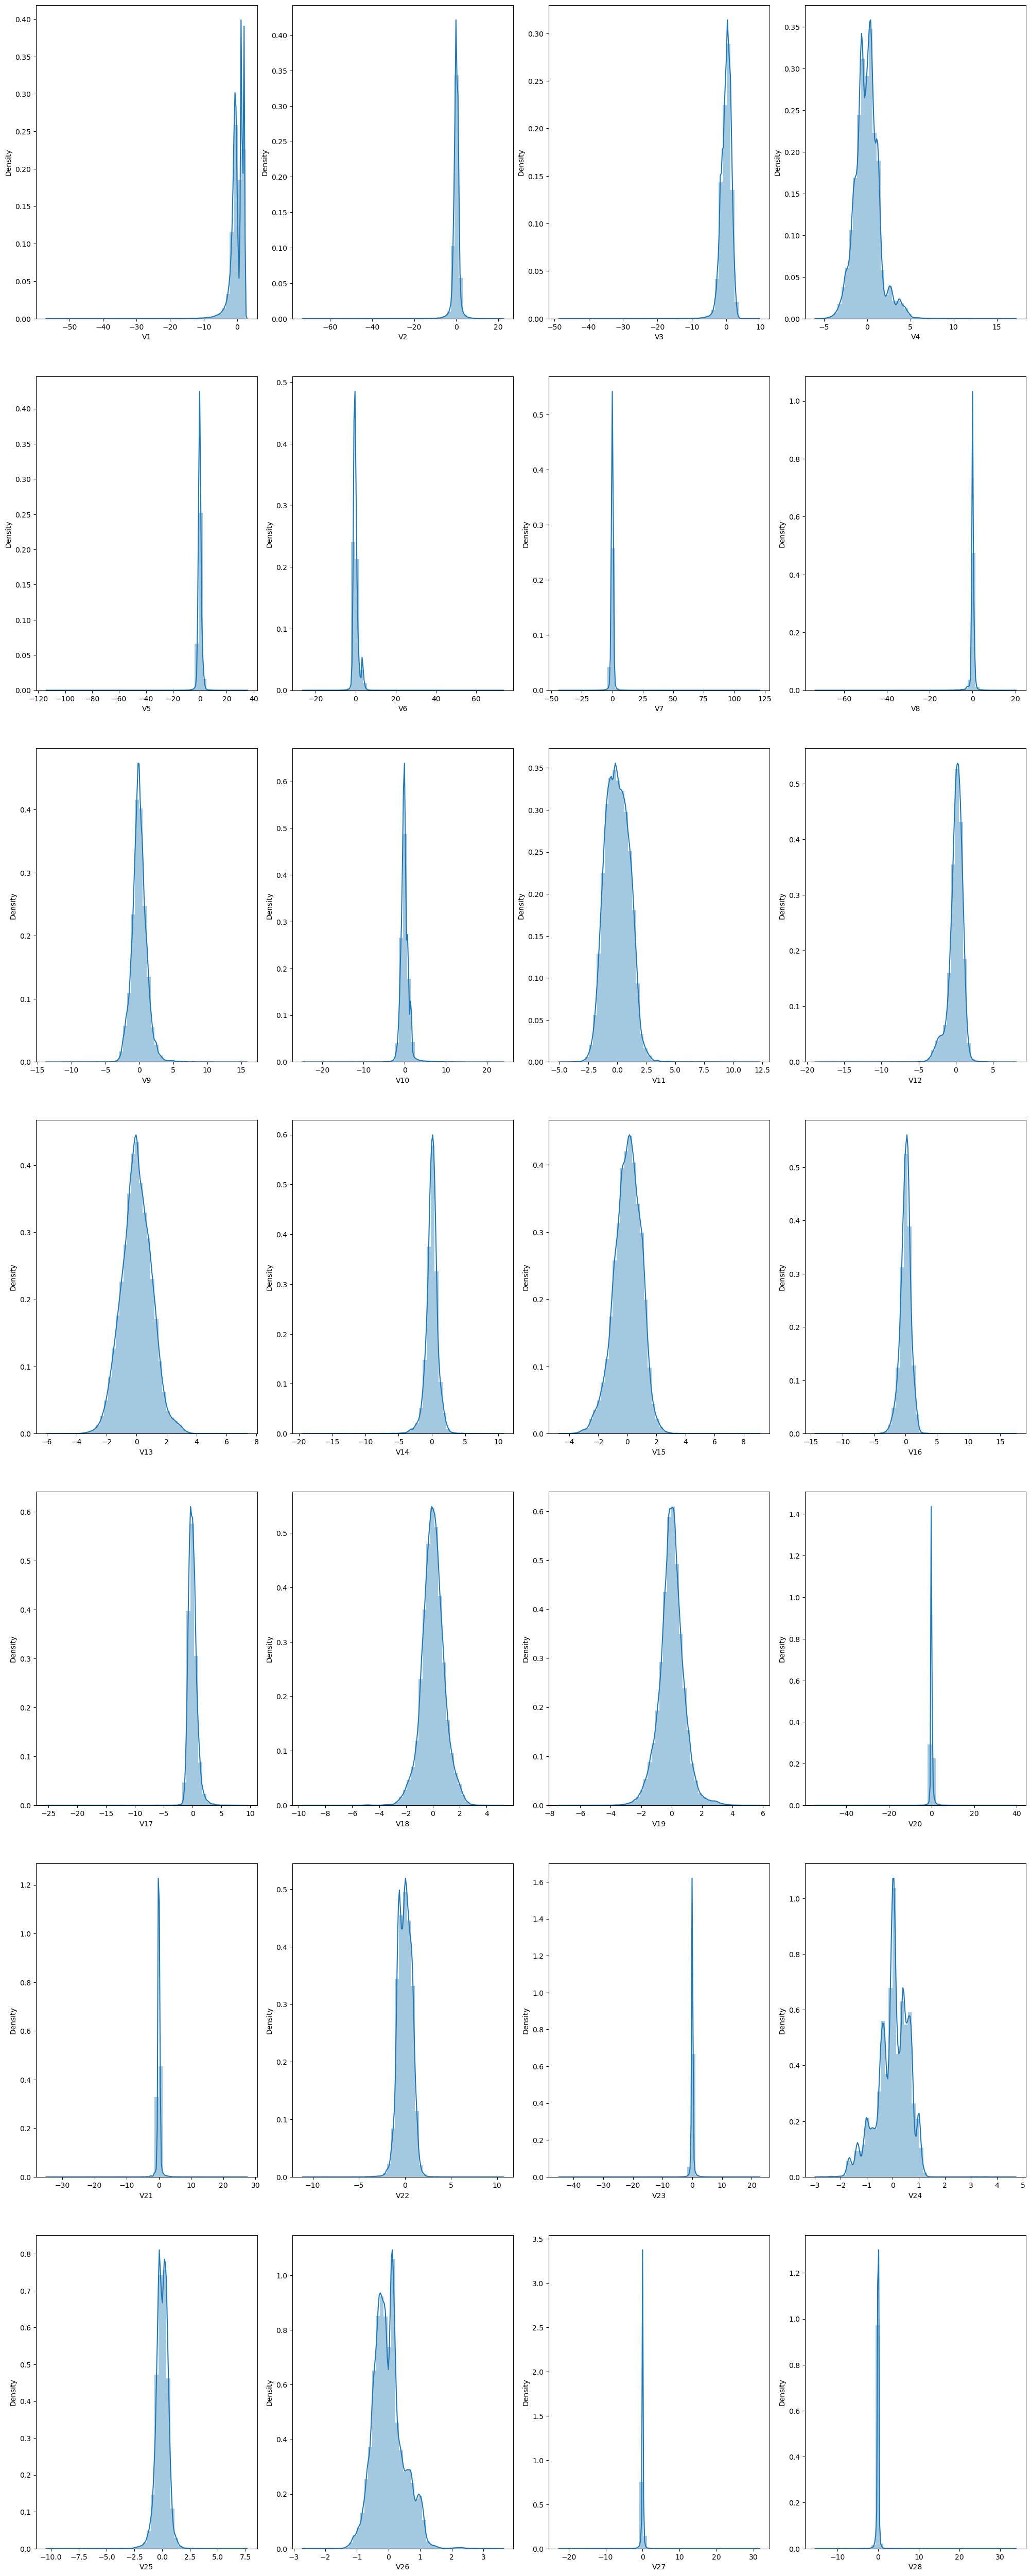

In [16]:
# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in creditfr_temp.columns:
    sns.distplot(creditfr_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.6, w_pad=0.6, h_pad=5)


<Axes: xlabel='Amount', ylabel='Density'>

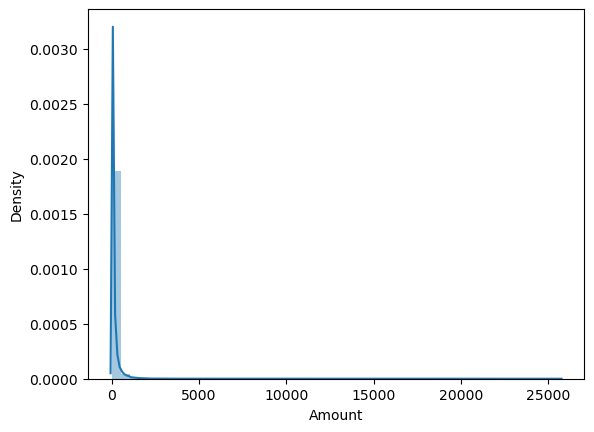

In [17]:
sns.distplot(creditfr['Amount'])

<Axes: xlabel='Time', ylabel='Density'>

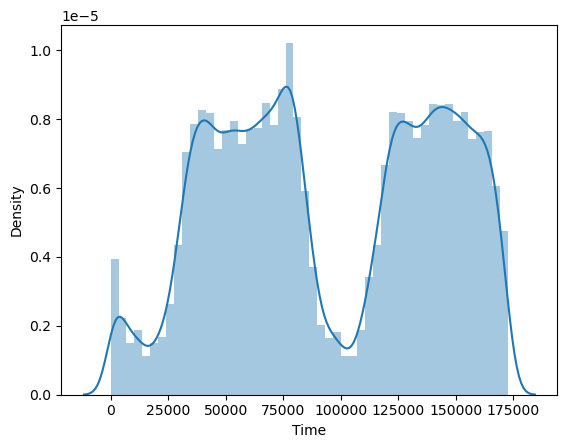

In [18]:
sns.distplot(creditfr['Time'])

## CORELATION MATRIX:

It shows the corelation coefficients between two variables

**heatmap:**

<Axes: >

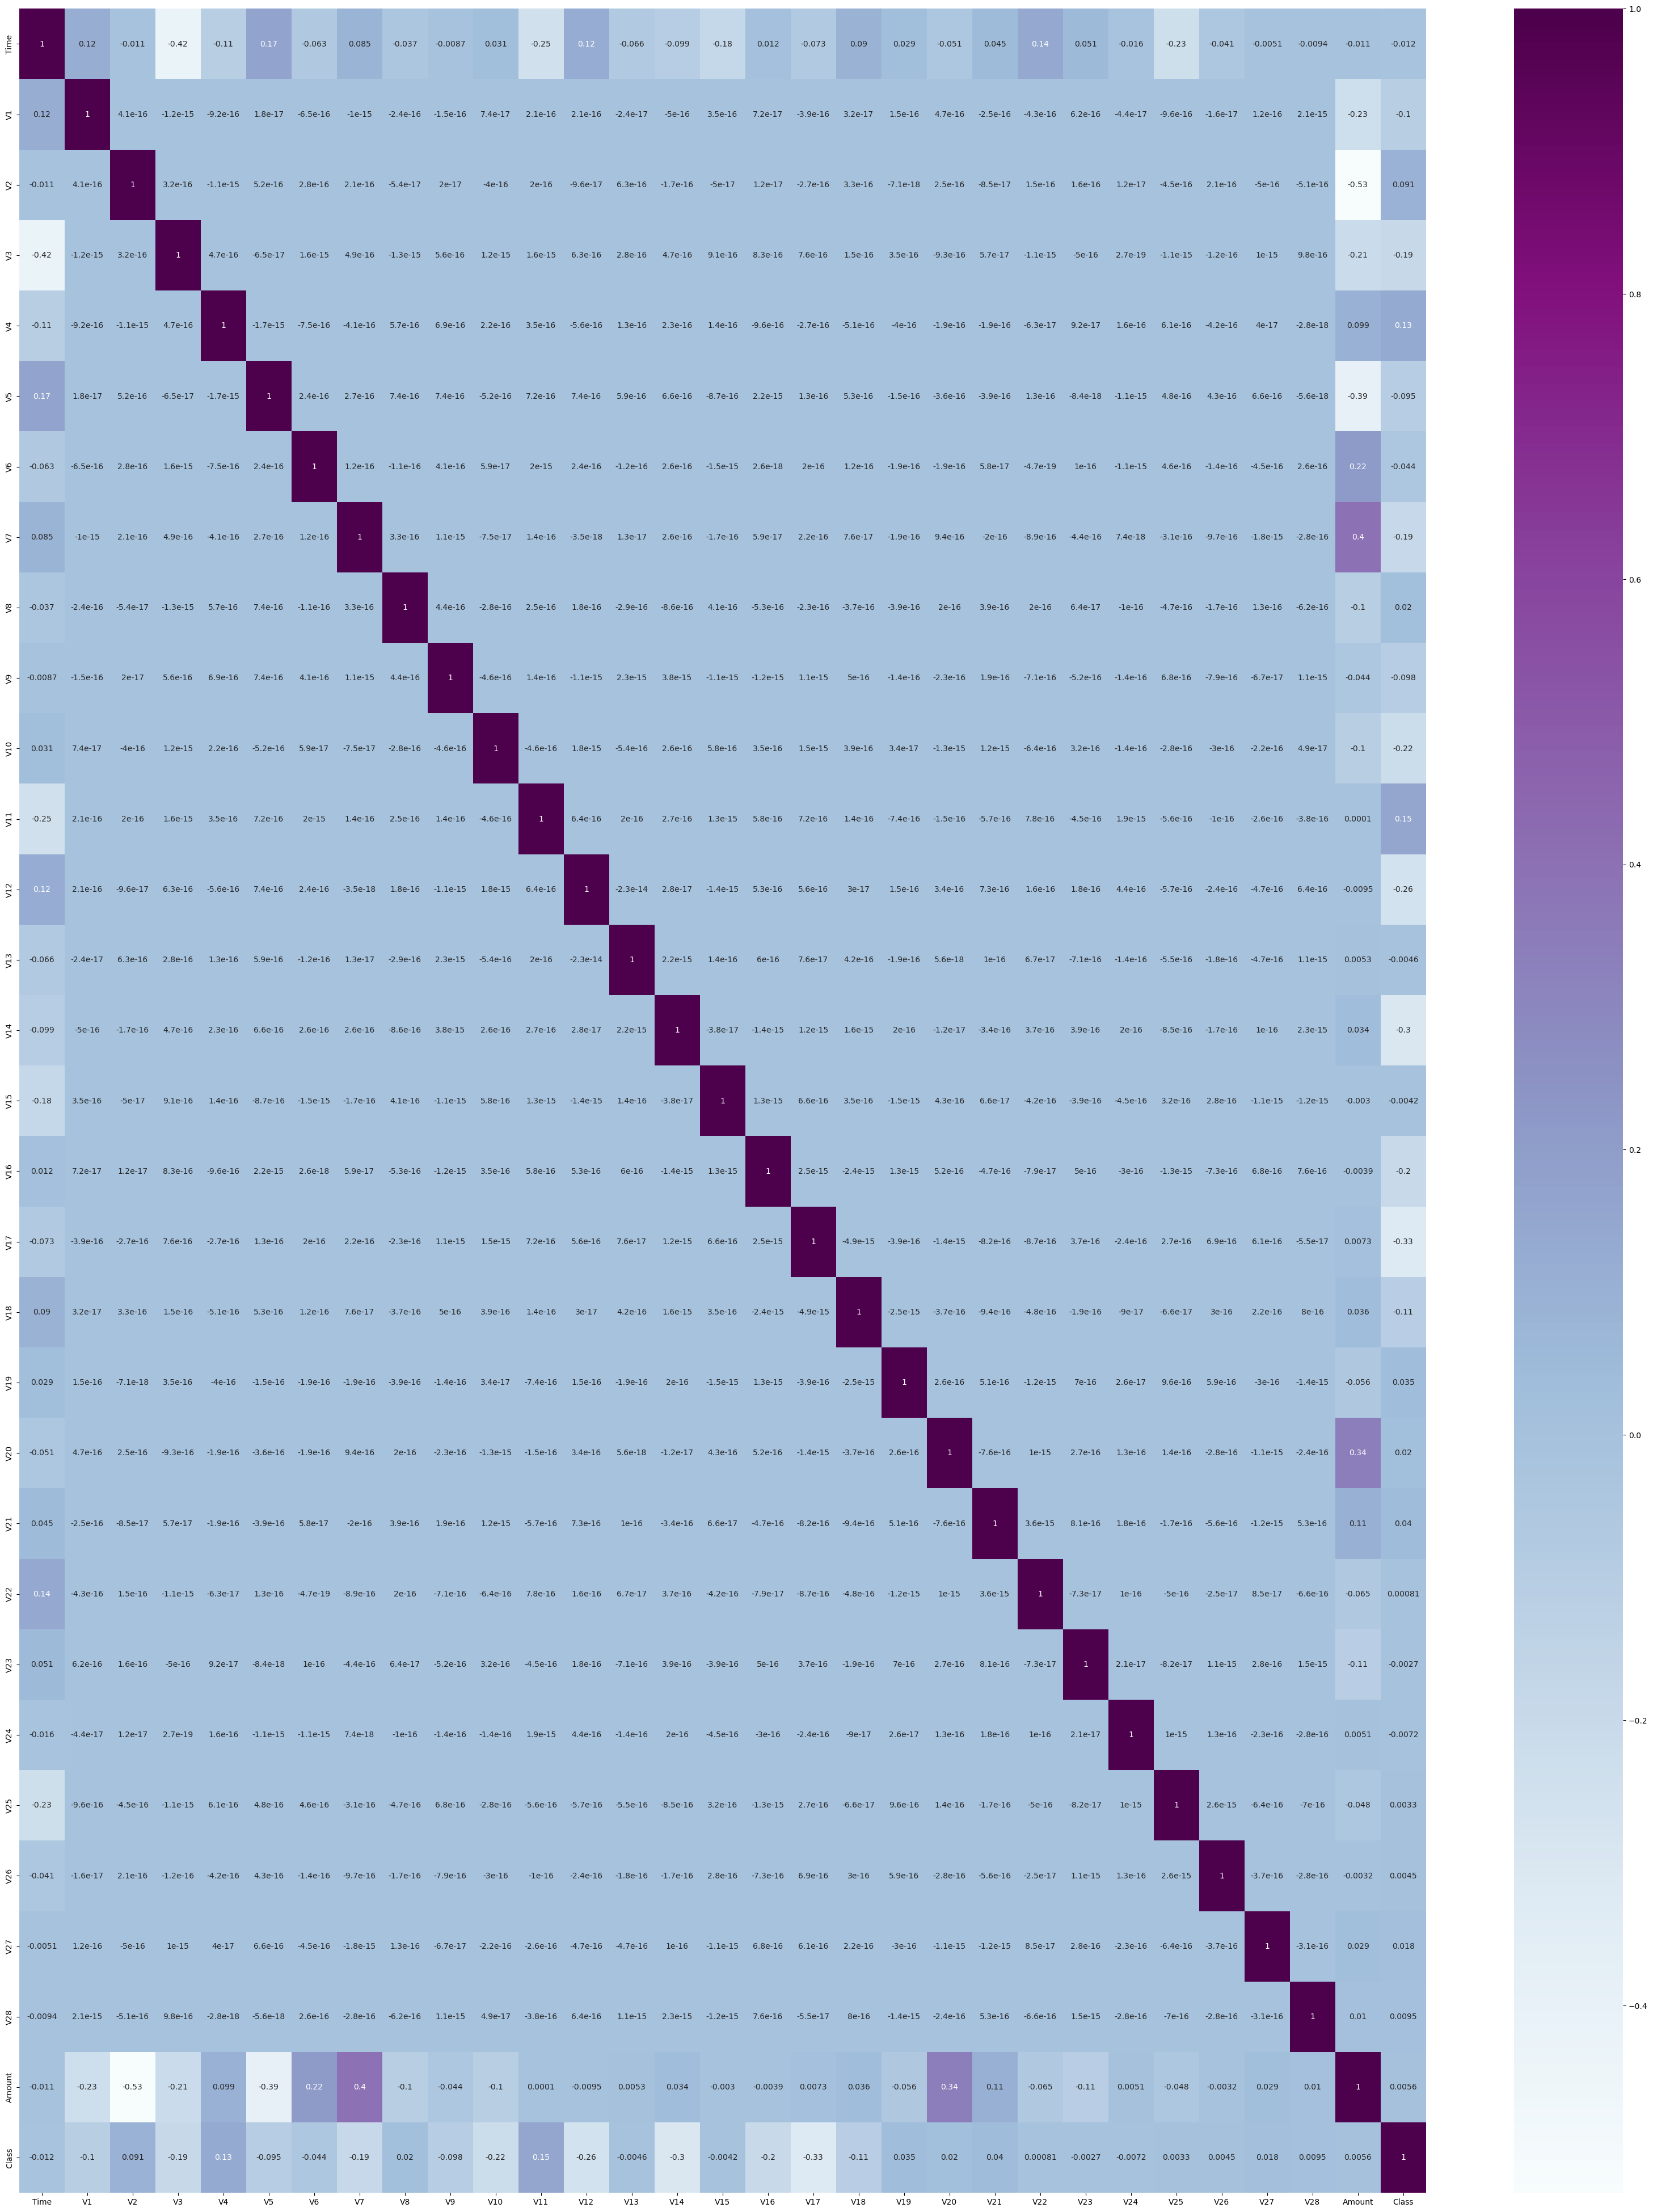

In [19]:
corr = creditfr.corr()
plt.figure(figsize=(40,50))
sns.heatmap(corr, annot=True, cmap='BuPu')

# 5.Input Split and Standard Scaling:

StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.

- **Standard scaling**

In [20]:
a = creditfr.drop(columns=['Class'], axis=1)
b = creditfr['Class']

In [21]:
ss = StandardScaler()
x_scaler = ss.fit_transform(a)

In [22]:
x_scaler[-1]

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

- **Data split into train and test set**

In [23]:
from sklearn.metrics import classification_report, f1_score
x_train, x_test, b_train, b_test = train_test_split(x_scaler, b, test_size=0.25, random_state=42, stratify=b)

# 6.Model Training:

In model training in this ml task, we are using two models .They are:

- **Logistic Regression**

- **Decision Tree Classifier**

## Logistic Regression:


Logistic regression is used to predict the categorical dependent variable. It's used when the prediction is categorical, for example, yes or no, true or false, 0 or 1.
o

**F1 Score:** It is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset.

In [24]:
model = LogisticRegression()
# training
model.fit(x_train, b_train)
# testing
b_pred = model.predict(x_test)
print(classification_report(b_test, b_pred))
print("F1 Score:",f1_score(b_test, b_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.719626168224299


**The f1 score ranges from 0 and 1 and here we can see that this model using Logistic Regression has a 0.72
which is pretty good accurate to determine the fraud rates.**

## Decision Tree Classifier Model:

Decision Tree Classifier is a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [30]:
# DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()

# Hyperparameter tuning
param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]} 
grid_search = GridSearchCV(dt_model, param_grid, cv=3)
grid_search.fit(x_train, b_train)

baseline_model = grid_search.best_estimator_

# Model evaluation
b_pred = baseline_model.predict(x_test)  # Evaluate on a smaller sample
print(" Decision Tree Model:")
print(classification_report(b_test, b_pred))
print(confusion_matrix(b_test, b_pred))

 Decision Tree Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.68      0.78       123

    accuracy                           1.00     71202
   macro avg       0.95      0.84      0.89     71202
weighted avg       1.00      1.00      1.00     71202

[[71070     9]
 [   39    84]]


# 7. ROC CURVE AND AUC SCORE:

**ROC CURVE: It is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate.**

**AUC SCORE: AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0**

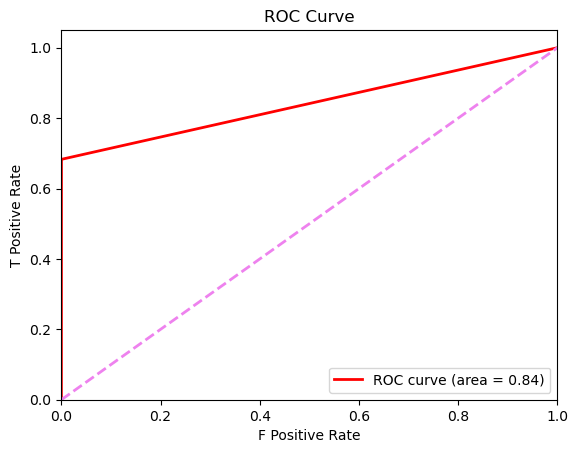

AUC Score: 0.8414001047957974


In [35]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Convert categorical sentiment labels to binary values (1 for POSITIVE, 0 for NEGATIVE)
label_encoder = LabelEncoder()
b_test_binary = label_encoder.fit_transform(b_test)
b_pred_binary = label_encoder.transform(b_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(b_test_binary, b_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='violet', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('F Positive Rate')
plt.ylabel('T Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score using roc_auc_score
auc_score = roc_auc_score(b_test_binary, b_pred_binary)
print("AUC Score:", auc_score)

Here we can see that the final AUC score is 0.8414 that implies that this model is effective since any auc score between 0.8-0.9 is considered a good auc score.

# RESULT:

This model is designed to reduce the fraud activities in credit card while keep in mind the low false positive rate.
It will improve the financial security on credit card and help financial institutions.